# **IMPORT DEPENDANCY**

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# **MENYIMPAN DATA DARI FILE KE VARIABEL**

In [2]:
df = pd.read_csv('water_potability.csv')
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


# **MENGECEK DATA NULL DAN PERSENTASE DATA NULL PADA DATASET**

In [3]:
df.isnull().sum()

,0
ph,491
Hardness,0
Solids,0
Chloramines,0
Sulfate,781
Conductivity,0
Organic_carbon,0
Trihalomethanes,162
Turbidity,0
Potability,0


In [4]:
df.isnull().mean()*100

,0
ph,14.987790
Hardness,0.000000
Solids,0.000000
Chloramines,0.000000
Sulfate,23.840049
Conductivity,0.000000
Organic_carbon,0.000000
Trihalomethanes,4.945055
Turbidity,0.000000
Potability,0.000000


# **MENGHAPUS RECORD YANG MEMPUNYAI DATA YANG HILANG**

In [5]:
df_dropped = df.dropna()
df_dropped.isnull().mean()*100

,0
ph,0.0
Hardness,0.0
Solids,0.0
Chloramines,0.0
Sulfate,0.0
Conductivity,0.0
Organic_carbon,0.0
Trihalomethanes,0.0
Turbidity,0.0
Potability,0.0


In [6]:
df_dropped.isnull().sum()

,0
ph,0
Hardness,0
Solids,0
Chloramines,0
Sulfate,0
Conductivity,0
Organic_carbon,0
Trihalomethanes,0
Turbidity,0
Potability,0


# **MEMPERBAIKI PENOMORAN INDEX DAN MENAMPILKAN DATASET LAGI**

In [7]:
df_dropped.reset_index(drop=True, inplace=True)
df_dropped

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
1,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
2,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
3,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
4,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
...,...,...,...,...,...,...,...,...,...,...
2006,8.989900,215.047358,15921.412018,6.297312,312.931022,390.410231,9.899115,55.069304,4.613843,1
2007,6.702547,207.321086,17246.920347,7.708117,304.510230,329.266002,16.217303,28.878601,3.442983,1
2008,11.491011,94.812545,37188.826022,9.263166,258.930600,439.893618,16.172755,41.558501,4.369264,1
2009,6.069616,186.659040,26138.780191,7.747547,345.700257,415.886955,12.067620,60.419921,3.669712,1


# **MENGECEK NILAI DUPLIKAT DALAM DATASET**

In [8]:
duplicate = df_dropped.duplicated().sum()
df_dropped['ph'].duplicated().sum()
print('Jumlah nilai duplikat pada data: ', duplicate)

Jumlah nilai duplikat pada data:  0


# **MENGECEK NILAI OUTLIER DALAM DATASET**

<Axes: >

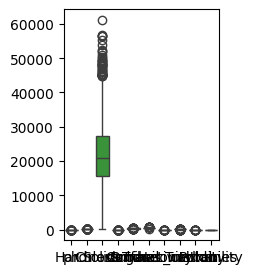

In [9]:
fig, ax = plt.subplots(figsize=(2,3)) #buat frame/figure
sns.boxplot(df) #buat boxplot

# **HAPUS NILAI OUTLIER DENGAN MENGGUNAKAN METODE IQR (INTERQUARTILE RANGE)**

In [10]:
Q1 = df_dropped.quantile(0.25)
Q3 = df_dropped.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_current = df_dropped[~((df_dropped < lower_bound) | (df_dropped > upper_bound)).any(axis=1)]

# **MEMPERBAIKI PENOMORAN INDEX DAN MENAMPILKAN DATASET LAGI**

In [11]:
df_current.reset_index(drop=True, inplace=True)
df_current

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
1,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
2,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
3,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
4,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
...,...,...,...,...,...,...,...,...,...,...
1789,5.893103,239.269481,20526.666156,6.349561,341.256362,403.617560,18.963707,63.846319,4.390702,1
1790,8.197353,203.105091,27701.794055,6.472914,328.886838,444.612724,14.250875,62.906205,3.361833,1
1791,8.989900,215.047358,15921.412018,6.297312,312.931022,390.410231,9.899115,55.069304,4.613843,1
1792,6.702547,207.321086,17246.920347,7.708117,304.510230,329.266002,16.217303,28.878601,3.442983,1


# **TRANSFORMASI NILAI DATASET MENGGUNAKAN METODE NORMALISASI MIN-MAX SCALING**

In [12]:
#Menginisialisasi Min Max Scaler
scaler = MinMaxScaler(feature_range=(0,1))
#Numerical Columns
num_col_ = [col for col in df_current.columns if df_current[col].dtypes != 'O' and col != 'Id']
x1 = df_current[num_col_]
#Mempelajari prameter statistik untuk setiap data dan ditransformasikan
x1 = scaler.fit_transform(x1)
x1 = pd.DataFrame(x1, columns=num_col_)
x1

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,0.666298,0.611452,0.491129,0.622712,0.613098,0.358484,0.726617,0.899096,0.654492,0.0
1,0.766275,0.400811,0.399695,0.428628,0.385314,0.436423,0.345719,0.088538,0.523011,0.0
2,0.313984,0.446468,0.643470,0.556706,0.465915,0.174862,0.170808,0.360368,0.163169,0.0
3,0.912174,0.824793,0.643494,0.552670,0.792289,0.181922,0.469289,0.712441,0.190068,0.0
4,0.707437,0.541737,0.302207,0.174132,0.352056,0.605405,0.390328,0.453831,0.600506,0.0
...,...,...,...,...,...,...,...,...,...,...
1789,0.353824,0.769066,0.457363,0.403347,0.536944,0.447970,0.755811,0.466260,0.597960,1.0
1790,0.650903,0.540113,0.619774,0.419174,0.476676,0.538885,0.494828,0.455110,0.353643,1.0
1791,0.753083,0.615719,0.353121,0.396644,0.398934,0.418680,0.253840,0.362164,0.650948,1.0
1792,0.458183,0.566804,0.383125,0.577651,0.357905,0.283081,0.603723,0.051542,0.372913,1.0


# **TRANSFORMASI NILAI POTABILITY MENJADI TRUE DAN FALSE MENGGUNAKAN ONE-HOT ENCODING**

In [13]:
enc = OneHotEncoder(handle_unknown='ignore')
enc_df = pd.DataFrame(enc.fit_transform(df_current[['Potability']]).toarray())
df_encoded = df_current.join(enc_df)
df_encoded = df_encoded.rename(columns={0: 'Non_Potable', 1: 'Potable'})
df_encoded.drop('Potability', axis=1, inplace=True)
df_encoded

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Non_Potable,Potable
0,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,1.0,0.0
1,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,1.0,0.0
2,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,1.0,0.0
3,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,1.0,0.0
4,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1789,5.893103,239.269481,20526.666156,6.349561,341.256362,403.617560,18.963707,63.846319,4.390702,0.0,1.0
1790,8.197353,203.105091,27701.794055,6.472914,328.886838,444.612724,14.250875,62.906205,3.361833,0.0,1.0
1791,8.989900,215.047358,15921.412018,6.297312,312.931022,390.410231,9.899115,55.069304,4.613843,0.0,1.0
1792,6.702547,207.321086,17246.920347,7.708117,304.510230,329.266002,16.217303,28.878601,3.442983,0.0,1.0


# **MEMBUAT FITUR BARU MENDESKRIPSIKAN KATEGORI KOTORNYA AIR DARI KOLOM TURBIDITY**

In [14]:
# batas nilai
bins = [0, 2, 4, 5, float('inf')]
# nama kategori
labels = ['clean', 'a little dirty', 'dirty', 'very dirty']
df_encoded['water_dirtiness'] = pd.cut(df_encoded['Turbidity'], bins=bins, labels=labels)
df_encoded

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Non_Potable,Potable,water_dirtiness
0,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,1.0,0.0,dirty
1,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,1.0,0.0,dirty
2,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,1.0,0.0,a little dirty
3,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,1.0,0.0,a little dirty
4,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,1.0,0.0,dirty
...,...,...,...,...,...,...,...,...,...,...,...,...
1789,5.893103,239.269481,20526.666156,6.349561,341.256362,403.617560,18.963707,63.846319,4.390702,0.0,1.0,dirty
1790,8.197353,203.105091,27701.794055,6.472914,328.886838,444.612724,14.250875,62.906205,3.361833,0.0,1.0,a little dirty
1791,8.989900,215.047358,15921.412018,6.297312,312.931022,390.410231,9.899115,55.069304,4.613843,0.0,1.0,dirty
1792,6.702547,207.321086,17246.920347,7.708117,304.510230,329.266002,16.217303,28.878601,3.442983,0.0,1.0,a little dirty


# **PENENTUAN TARGET**
## Fitur yang digunakan: semua kolom kecuali potability

In [16]:
# Subset feature dan target
x = df_current.iloc[:,:-1] # Feature
y = df_current['Potability'] # Target
print(x)

             ph    Hardness        Solids  Chloramines     Sulfate  \
0      8.316766  214.373394  22018.417441     8.059332  356.886136   
1      9.092223  181.101509  17978.986339     6.546600  310.135738   
2      5.584087  188.313324  28748.687739     7.544869  326.678363   
3     10.223862  248.071735  28749.716544     7.513408  393.663396   
4      8.635849  203.361523  13672.091764     4.563009  303.309771   
...         ...         ...           ...          ...         ...   
1789   5.893103  239.269481  20526.666156     6.349561  341.256362   
1790   8.197353  203.105091  27701.794055     6.472914  328.886838   
1791   8.989900  215.047358  15921.412018     6.297312  312.931022   
1792   6.702547  207.321086  17246.920347     7.708117  304.510230   
1793   6.069616  186.659040  26138.780191     7.747547  345.700257   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  
0       363.266516       18.436524       100.341674   4.628771  
1       398.410813       11.5

#**STANDARISASI**

In [17]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# **SPLITTING DATA**

In [163]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)


In [97]:
print(x_train.shape)
print(x_test.shape)

(1255, 9)
(539, 9)


# **MODEL**

In [267]:
model = Sequential()
model.add(Dense(256, input_dim=x_train.shape[1], activation='relu'))

model.add(Dense(256, activation='relu'))

model.add(Dense(16, activation='relu'))

model.add(Dense(16, activation='relu'))

# model.add(Dense(32, activation='relu'))

# model.add(Dense(32, activation='relu'))

model.add(Dense(10, activation='sigmoid'))

# **CALLBACK**

In [268]:
from tensorflow.keras.callbacks import EarlyStopping

monitor = EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    restore_best_weights=True
)

#**COMPILE**

In [269]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

#**TRAIN**

In [270]:
history = model.fit(
    x_train,
    y_train,
    epochs=60,
    batch_size=32,
    validation_data=(x_test, y_test),
    callbacks=[monitor],
    verbose=1,

    # optional
    # steps_per_epoch=10,
    # validation_steps=50
)


Epoch 1/60
45/45 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - accuracy: 0.4061 - loss: 1.9113 - val_accuracy: 0.5905 - val_loss: 0.9737
Epoch 2/60
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6022 - loss: 0.8065 - val_accuracy: 0.5961 - val_loss: 0.6609
Epoch 3/60
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5855 - loss: 0.6652 - val_accuracy: 0.6128 - val_loss: 0.6470
Epoch 4/60
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6747 - loss: 0.6179 - val_accuracy: 0.6602 - val_loss: 0.6182
Epoch 5/60
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6901 - loss: 0.5907 - val_accuracy: 0.6880 - val_loss: 0.6028
Epoch 6/60
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6942 - loss: 0.5755 - val_accuracy: 0.6825 - val_loss: 0.6368
Epoch 7/60
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6832 - loss: 0.6027 - val_accuracy: 0.6936 - val_loss: 0.5820
Epoch 8/60
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6829 - loss: 0.5686 - val_accuracy: 0.6908 - val_loss

#**EVALUASI**

In [271]:
model.evaluate(x_test, y_test)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7285 - loss: 0.5742 


[0.5750908255577087, 0.7214484810829163]

<function matplotlib.pyplot.show(close=None, block=None)>

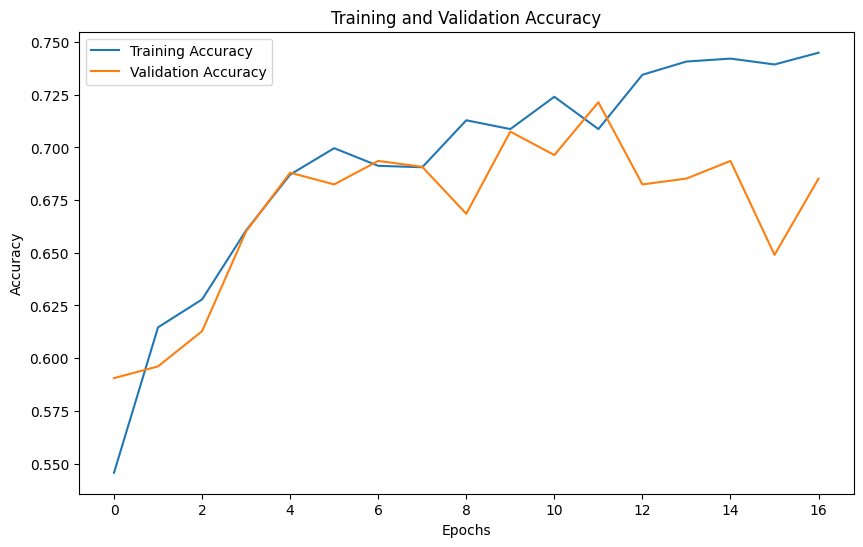

In [272]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label="Training Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show

In [273]:
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred))

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
              precision    recall  f1-score   support

           0       0.71      0.88      0.79       212
           1       0.74      0.49      0.59       147

    accuracy                           0.72       359
   macro avg       0.73      0.69      0.69       359
weighted avg       0.73      0.72      0.71       359

